### Dataset Explanation
CRIM: 범죄율  
INDUS: 비소매상업지역 면적 비율  
NOX: 일산화질소 농도  
RM: 주택당 방 수  
LSTAT: 인구 중 하위 계층 비율  
B: 인구 중 흑인 비율  
PTRATIO: 학생/교사 비율  
ZN: 25,000 평방피트를 초과 거주지역 비율  
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
AGE: 1940년 이전에 건축된 주택의 비율  
RAD: 방사형 고속도로까지의 거리  
DIS: 직업센터의 거리  Q
TAX: 재산세율  
MEDV (정답열) : 집의 가격  

## Dataset Loading

In [ ]:
import pandas as pd

dataset = pd.read_csv('sample_data/boston.csv')
dataset = dataset.drop('CAT. MEDV', axis=1)
dataset.shape

(506, 14)

## 데이터셋 분석

* info() 결측치 확인 : 결측치가 없다
* info()  자료형의 타입이 수치형이 대부분

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


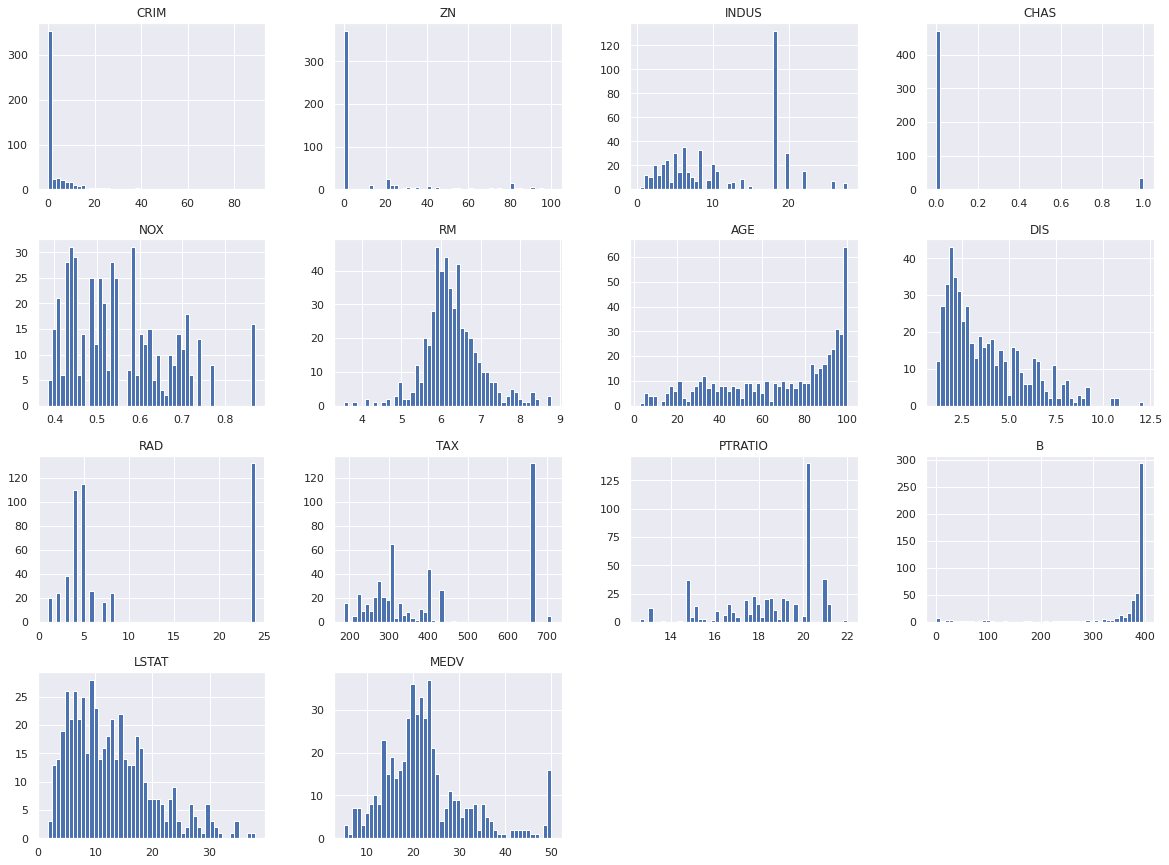

In [ ]:
# dataset distribution
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))  #bins : 막대기 넓이 조절
plt.show()

우선 데이터셋의 속성들이 집의 가격과 어떤 관계를 가지고 있는지 확인할 필요가 있습니다.

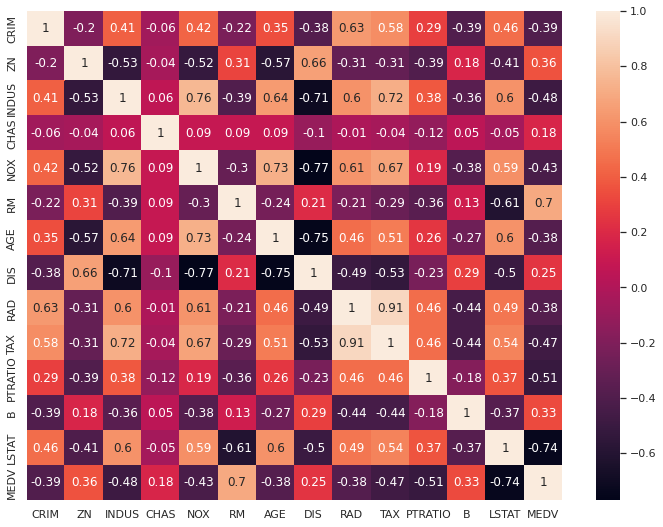

In [ ]:
# Correlation
from matplotlib import pyplot as plt
import seaborn as sns 

correlation_matrix = dataset.corr().round(2)

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True) # 상관계수 분석
plt.show()
plt.close()

In [ ]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
#### 2.Find correlations with the target and sort
correlations = dataset.corr()['MEDV'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.head(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
Name: MEDV, dtype: float64

Most Negative Correlations:
 LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
Name: MEDV, dtype: float64


- 집의 가격과 제일 비례하는 것 : RM (방의 개수), 70%
- 집의 가격과 제일 반비례하는 것 : LSTAT(하위계층 비율), -74%
- RAD와 TAX의 상관관계가 무려 91%나 됨.
- DIS는 다른 데이터들과 상관관계가 높은편임.

- 회귀분석 결론 :   
집의 가격은 방의 개수와 하위계층 비율과 큰 상관관계가 있고, 나머지 데이터와는 유의미한 관계 포착이 어렵습니다. 또한, RAD(고속도로와 거리)와 TAX(재산세율)의 경우 다중공선성이 우려되므로, 이 두 데이터는 반드시 빼고 회귀를 진행해야하며, DIS의 경우 다른 데이터들과 상관관계가 높으니 DIS(작업센터 거리)도 반드시 빼고 진행해야합니다.


- 다중공선성 검정:  
독립변수 끼리의 상관 계수가 지나치게 높으면 다중공선성의 문제가 있는데 해결 방법으로 특정 임계값을 정하여 그 값을 초과했을 때 해당 변수의 일부를 제거하는 방법이 있다.
문제는 그 임계값을 어떻게 설정하느냐에 대한 rule이 없었기에, 구글링을 해본 결과 Simon Fraser University(SFU)에서 제공한 PDF에서 참고>>  
엄지손가락의 규칙 : 상관 관계가 0.8을 초과한 경우 심각한 다중공선성 존재 가능으로 해석이 된다. 이 문서를 보고 임계값은 0.8로 정했고 그 임계값을 초과하는 경우는 변수에서 제외하는 방향으로 설정했다.

## 3.Modeling

In [ ]:
boston_df = pd.DataFrame(dataset)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39,34.9
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4


In [ ]:
# 상관관계가 높은 feature만 쓰자!
sel = ["RM",'LSTAT']
X = boston_df[sel]
y = boston_df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) # test_size=0.3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sklearn 모델 생성하기
model = LinearRegression()

# sklearn 모델 학습하기 : fit 함수
model.fit(X_train, y_train) 

# sklearn 모델 테스트하기 : predict 함수
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2_score = r2_score(train_pred, y_train)
test_r2_score = r2_score(test_pred, y_test)
# 회귀모델은 R스퀘어로 평가합니다.

print('train r2 score : {}'.format(train_r2_score))
print('test r2 score : {}'.format(test_r2_score))

train r2 score : 0.38091040501721407
test r2 score : 0.5914690607400703


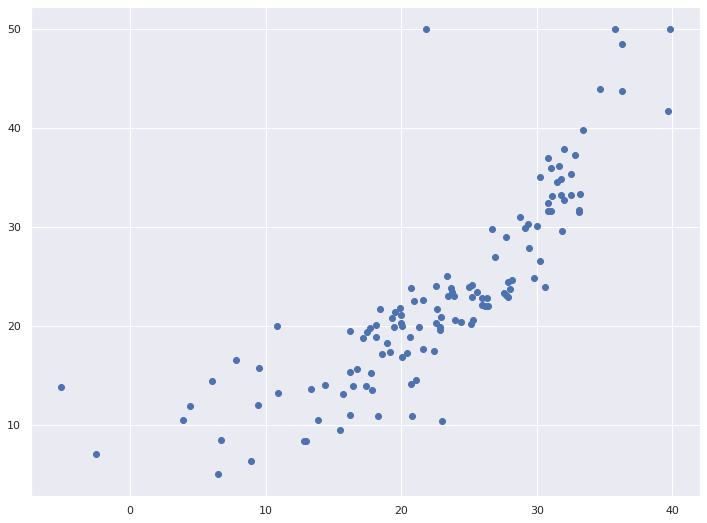

In [ ]:
plt.scatter(test_pred, y_test)
plt.show()
plt.close()

### Save the model
- 케라스와 달리 사이킷런은 자제적으로 모델을 저장하고 불러오는 기능을 지원하지 않으므로 pickle 또는 joblib모듈을 사용해야 합니다.
여기서는 joblib모듈을 사용하겠습니다. joblib 모듈은 내부적으로 pickle을 이용하면서 대규모 넘파이 배열에 더 적합한 구조를 가지고 있습니다. 

In [ ]:
# sklearn 모델 저장
import joblib
import os

if not os.path.exists('./models/'):
    os.makedirs('./models/')

joblib.dump(model, './models/linear_regression.pkl')